# Mini Batch Gradient Descent

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [12]:
#Get or Create a Dataset
x,y= make_regression(n_samples=10000,n_features=20, n_informative=20,noise=10,random_state=10000)

#Normilisation
u=np.mean(x,axis=0)
std=np.std(x,axis=0)
x=(x-u)/std
x


array([[-1.51368199, -0.06746467,  0.13574608, ..., -1.65413539,
        -0.21719796, -1.31538298],
       [ 0.19540052,  0.57793625, -0.40275758, ..., -1.1705029 ,
         0.31369962,  0.56001888],
       [-0.58785306, -0.00232898,  0.36817228, ..., -1.44449634,
        -0.08806152,  0.889108  ],
       ...,
       [-1.09984931,  0.31738128, -1.17591488, ..., -1.49213908,
        -1.23185104,  0.47336689],
       [-0.22773919,  1.56212079, -0.93205735, ...,  1.36379928,
        -0.24129093, -0.76113976],
       [-0.00590882, -0.76231123,  1.36509172, ..., -0.43617846,
        -0.91656261,  2.29475257]])

In [15]:
ones= np.ones((x.shape[0],1))
x= np.hstack((ones,x))
print(x.shape)

(10000, 23)


In [26]:
def hypothesis(x,theta):
    return np.dot(x,theta)

def error(X,y,theta):
    e= 0.0
    m=X.shape[0] #examples
    
    y_=hypothesis(X,theta)
    e=np.sum((y-y_)**2)# error for ith example
    
    return e/m

def gradient(X,y,theta):
    m,n= X.shape
    y_=hypothesis(X,theta)
    grad= np.dot(X.T,(y_-y))
    return grad/m

def gradient_descent(X,y,learning_rate=0.01,max_iters=300):
    m,n=X.shape
    theta=np.zeros((n,))
    error_list= []
    
    for i in range(max_iters):
        e=error(X,y,theta)
        error_list.append(e)
        
        # Batch Gradient Descent -> compute the gradient wrt to entire data
        grad=gradient(X,y,theta)
        theta=theta-learning_rate*grad
            
    return theta,error_list



In [ ]:
def batch_gradient_descent(x,y,batch_size=20, learning_rate=0.01,max_iters=100):
    m,n=X.shape
    theta=np.zeros((n,))
    error_list= []
    
    data= np.hstack((x,y.reshape(-1,1)))
    for i in range(max_iters):
        e=error(X,y,theta)
        error_list.append(e)
        
        # Mini Batch Gradient Descent
        np.random.suffle(data)
        m=data.shape[0]
        total_batches=m//batch_size
        
    return theta,error_list

In [22]:
import time
start =time.time()
theta,error_list= gradient_descent(x,y)
end=time.time()
print("Time taken is ", end-start)

Time taken is  0.13029789924621582


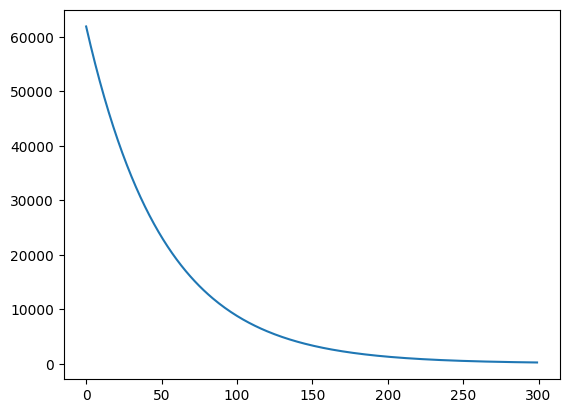

In [23]:
plt.plot(error_list)
plt.show()